# IMEC2001 Herramientas Computacionales
## Semana 6: Optimización
### Clase 11-12:  Optimización y Sistemas de Bombeo

Universidad de los Andes — Mayo 10 y 12, 2023.

---

## TABLA DE CONTENIDO

### Sección 1: Optimización [→](#section1)
- 1.1. Introducción
- 1.2. Cargar Librerías
- 1.3. Sintaxis: Caso Lineal
    - 1.3.1. Paso 1. Forma Estándar
    - 1.3.2. Paso 2. Coeficientes Función Objetivo
    - 1.3.3. Paso 3. Coeficientes Desigualdades
    - 1.3.4. Paso 4. Coeficientes Igualdades
    - 1.3.5. Paso 5. Límites de Variables
    - 1.3.6. Paso 6. Ejecutar Optimización
- 1.4. Sintaxis: Caso No Lineal
    - 1.4.1. Paso 1. Forma Estándar
    - 1.4.2. Paso 2. Función Objetivo
    - 1.4.3. Paso 3. Restricciones
    - 1.4.4. Paso 4. Límites de Variables
    - 1.4.5. Paso 5. Estimación Inicial
    - 1.4.6. Paso 6. Ejecutar Optimización

### Sección 2: Sistema de Bombeo [→](#section2)
- 2.1. Introducción
- 2.2. Optimización
    - 2.2.1. Paso 1. Forma Estándar
    - 2.2.2. Paso 2. Función Objetivo
    - 2.2.3. Paso 3. Restricciones
    - 2.2.4. Paso 4. Límites de Variables
    - 2.2.5. Paso 5. Estimación Inicial
    - 2.2.6. Paso 6. Ejecutar Optimización
___

<a id="section1"></a>
# Sección 1: Optimización

## 1.1. Introducción

La optimización es la aplicación de **métodos analíticos y numéricos** enfocados en encontrar e identificar al mejor candidato de entre una colección de alternativas. 

<div class="alert alert-block alert-success">
Un problema de optimización es un problema de decisión.
</div>

Los elementos que componen un ejercicio de optimización son:

- **Variables de decisión:** Selección de las variables independientes que sean adecuadas para caracterizar los posibles diseños candidatos y las condiciones de funcionamiento del sistema. Como variables independientes se suelen elegir aquellas que tienen un impacto significativo sobre la función objetivo.

- **Restricciones:** Establecer mediante ecuaciones las relaciones existentes entre las variables de decisión. Estas relaciones son debidas, por ejemplo, a limitaciones en el sistema, a leyes naturales o a limitaciones tecnológicas.

- **Función objetivo:** Elemento utilizado para decidir los valores adecuados de las variables de decisión que resuelven el problema de optimización. La función objetivo permite determinar los mejores valores para las variables de decisión. También se conoce como **criterio de elección**.

<div class="alert alert-block alert-success">
En general, la optimización indica los valores de las variables de decisión que producen el mínimo
o máximo valor (según el criterio utilizado) de la función objetivo elegida.
</div>

Algunos ejemplos de optimización son de tipo económico (coste total, beneficio), de tipo tecnológico (energía mínima, máxima capacidad de carga, máxima tasa de producción) o de tipo temporal (tiempo de producción mínimo) entre otros.

**Nota:** Únicamente se utilizará **un único criterio de optimización**, no estamos interesados en encontrar una solución que, por ejemplo, minimice el coste, maximice la producción y al mismo tiempo minimice la energía utilizada (los problemas que utilizan varios criterios de búsqueda entran dentro de la llamada optimización multiobjetivo).

Entonces:

<div class="alert alert-block alert-success">
Un problema de optimización consiste en la búsqueda de valores para unas determinadas variables (variables de decisión) de forma que, cumpliendo un conjunto de requisitos representados mediante ecuaciones y/o inecuaciones algebráicas (restricciones) que limitarán la elección de los valores de las variables de decisión, proporcionan el mejor valor posible para una función (función objetivo) que es utilizada para medir el rendimiento del sistema que se estudia.
</div>

En otras palabras, buscamos valores que cumplan unas condiciones y minimicen o maximicen una función que caracteriza el sistema.

La sintaxis es:

$$
\begin{cases}
  \text{Optimizar} & \rightarrow f(x)\\ 
  \\
  \text{Sujeto a (S.T.)} & \rightarrow \text{Restricciones}\\
\end{cases} 
$$

<br><br>
[1] Universidad Politécnica de Cartagena (s.f.). Fundamentos de Optimización, Capítulo 1. DMAE - UPCT.

## 1.2. Cargar Librerías

Primero, asegurémonos de haber instalado las librerías:

> ```python
  !pip install scipy
  ```

In [1]:
# Datos y Gráficas
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Optimización
from scipy import optimize

## 1.3. Sintaxis: Caso Lineal

Antes de iniciar con ejemplos aplicados, entendamos la sintaxis de la librería `scipy.optimize.linprog`.

**Función Objetivo**<br>
La librería `scipy.optimize.linprog` únicamente realiza **minimización**. Entonces, si el ejercicio es de maximizar, debemos hacer la transformación al multiplicar la función objetivo por $-1$. Por ejemplo:

$$
\text{Maximizar} \hspace{0.5cm} f(x) = x + 2y
$$

Es equivalente a:

$$
\text{Minimizar} \hspace{0.5cm} -f(x) = -x - 2y
$$

**Restricciones**<br>
Únicamente se tienen en cuenta las desigualdades de tipo $\leq$. Por ello, si la restricción es $\geq$, debemos hacer la transformación al multiplicar la restricción por $-1$. Por ejemplo:

$$
6x + 8y \geq 100
$$

Es equivalente a:

$$
-6x - 8y \leq -100
$$

Esta forma se denomina **estandar**.

<div class='alert alert-block alert-info'> 

<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `scipy.optimize.linprog` dando clic [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html).
</div>

En este caso, se busca:

$$
\begin{cases}
  \text{Maximizar} & x + 2y\\ 
  \\
  \text{S.A.} & \begin{cases}
                  2x + y \leq 20 & (1)\\
                  \\
                  -4x + 5y \leq 10 & (2)\\
                  \\
                  -x + 2y \geq -2 & (3)\\
                  \\
                  -x + 5y = 15 & (4)\\
                \end{cases}\\
  \\
  \text{Variables} & \begin{cases}
                       x \geq 0\\
                       \\
                       y \geq 0
                     \end{cases}
\end{cases} 
$$

### 1.3.1. Paso 1. Forma Estándar

1. La función objetivo es de maximización. Por tanto, la transformamos a **minimización** al multiplicarla por $-1$.
2. La tercera restricción es de tipo $\geq$. Entonces, la transformamos a $\leq$ al multiplicarla por $-1$.
3. Todo lo demás está en forma estándar.

El ejercicio resultante en forma estandar es:

$$
\begin{cases}
  \text{Minimizar} & -x + -2y\\ 
  \\
  \text{S.A.} & \begin{cases}
                  2x + y \leq 20 & (1)\\
                  \\
                  -4x + 5y \leq 10 & (2)\\
                  \\
                  x - 2y \leq 2 & (3)\\
                  \\
                  -x + 5y = 15 & (4)\\
                \end{cases}\\
  \\
  \text{Variables} & \begin{cases}
                       x \geq 0\\
                       \\
                       y \geq 0
                     \end{cases}
\end{cases} 
$$

### 1.3.2. Paso 2. Coeficientes Función Objetivo

Creamos una lista a partir de los coeficientes de la función objetivo $f(x)$. En este caso:

$$
f(x) = -x + -2y
$$

In [2]:
f_obj = [-1, -2]
f_obj

[-1, -2]

### 1.3.3. Paso 3. Coeficientes Desigualdades

Creamos una lista en donde se alojen los coeficientes de las restricciones de tipo **desigualdad**. Similar a la matriz de coeficientes que vimos en `C9_sistemaecuaciones.ipynb` y `C10_estatica.ipynb`, cada lista **interna** corresponde a cada ecuación.

<div class="alert alert-block alert-success">
    
**IMPORTANTE**<br>
Se deben crear dos listas:
1. Para los coeficientes del lado **izquierdo** de la desigualdad (LHS). Es una **lista de listas (`[[], [], ...]`)**.
2. Para los coeficientes del lado **derecho** de la desigualdad (RHS). Es una **lista**.
</div>

$$
\begin{cases}
  2x + y \leq 20 & (1)\\
  \\
  -4x + 5y \leq 10 & (2)\\
  \\
  x - 2y \leq 2 & (3)\\
\end{cases}
$$

In [3]:
lhs_des = [ [ 2, 1], # Ecuación 1
            [-4, 5], # Ecuación 2
            [1, -2] ] # Ecuación 3

lhs_des

[[2, 1], [-4, 5], [1, -2]]

In [4]:
rhs_des = [ 20, # Ecuación 1
            10, # Ecuación 2
            2] # Ecuación 3

rhs_des

[20, 10, 2]

### 1.3.4. Paso 4. Coeficientes Igualdades

Creamos una lista en donde se alojen los coeficientes de las restricciones de tipo **igualdad**.

<div class="alert alert-block alert-success">
    
**IMPORTANTE**<br>
Se deben crear dos listas:
1. Para los coeficientes del lado **izquierdo** de la desigualdad (LHS). Es una **lista de listas (`[[], [], ...]`)**.
2. Para los coeficientes del lado **derecho** de la desigualdad (RHS). Es una **lista**.
</div>

$$
-x + 5y = 15 \hspace{0.5cm} (4)
$$

In [5]:
lhs_igu = [ [-1, 5] ] # Ecuación 4
lhs_igu

[[-1, 5]]

In [6]:
'''
Notemos que aunque es un único valor,
este lo alojamos en la **lista**
'''
rhs_igu = [15] # Ecuación 4
rhs_igu

[15]

### 1.3.5. Paso 5. Límites de Variables

Creamos una lista de listas `[[], [], ...]` en donde se definan los valores mínimo y máximo que puede tomar las variables. La cantidad de listas internas dependen de la cantidad de variables.

$$
\begin{cases}
   x \geq 0\\
   \\
   y \geq 0
\end{cases}
$$

Notemos que únicamente nos indican el valor mínimo (cero para las dos variables). Esto quiere decir que el valor máximo es $\infty$ (definido como `numpy.inf`, `math.inf`, `scipy.inf` o `float('inf')`.

In [7]:
limites = [ [0, np.inf], # x
            [0, np.inf]] # y

limites

[[0, inf], [0, inf]]

### 1.3.6. Paso 6. Ejecutar Optimización

Se ejecuta la librería `scipy.optimize.linprog`, la cual tiene los siguientes parámetros:

- `c`: Los coeficientes de la función objetivo lineal a minimizar (**Paso 2**).
- `A_ub`: Coeficientes del lado izquierdo de las restricciones de desigualdad (**Paso 3**).
- `b_ub`: Coeficientes del lado derecho de las restricciones de desigualdad (**Paso 3**).
- `A_eq`: Coeficientes del lado izquierdo de las restricciones de igualdad (**Paso 4**).
- `b_eq`: Coeficientes del lado derecho de las restricciones de igualdad (**Paso 4**).
- `bounds`: Límites de variables (**Paso 5**).

In [8]:
sol = optimize.linprog(c=f_obj, 
                       A_ub=lhs_des, 
                       b_ub=rhs_des, 
                       A_eq=lhs_igu, 
                       b_eq=rhs_igu, 
                       bounds=limites)

sol

           con: array([0.])
 crossover_nit: 0
         eqlin:  marginals: array([-0.27272727])
  residual: array([0.])
           fun: -16.818181818181817
       ineqlin:  marginals: array([-0.63636364, -0.        , -0.        ])
  residual: array([ 0.        , 18.18181818,  3.36363636])
         lower:  marginals: array([0., 0.])
  residual: array([7.72727273, 4.54545455])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 0
         slack: array([ 0.        , 18.18181818,  3.36363636])
        status: 0
       success: True
         upper:  marginals: array([0., 0.])
  residual: array([inf, inf])
             x: array([7.72727273, 4.54545455])

<div class="alert alert-block alert-warning">   

**SU TURNO**

Resuelva con `Excel Solver` el siguiente ejercicio de optimización lineal.

$$
\begin{cases}
  \text{Maximizar} & 3x + 4y\\ 
  \\
  \text{S.A.} & \begin{cases}
                  2x_1 + 5y \leq 30 & (1)\\
                  \\
                  4x_1 + 2y \leq 20 & (2)\\
                \end{cases}\\
  \\
  \text{Variables} & \begin{cases}
                       x \geq 0\\
                       \\
                       y \geq 0
                     \end{cases}
\end{cases} 
$$

</div>

In [9]:
# Coeficientes Función Objetivo (Forma Estándar)
f_obj = [-3, -4]
f_obj

[-3, -4]

In [10]:
# Coeficientes Desigualdades
lhs_des = [ [ 2, 5], # Ecuación 1
            [4, 2] ] # Ecuación 2

rhs_des = [ 30, # Ecuación 1
            20] # Ecuación 2

In [11]:
# Límites de Variables
limites = [ [0, np.inf], # x
            [0, np.inf]] # y

limites

[[0, inf], [0, inf]]

In [12]:
sol = optimize.linprog(c=f_obj,
                       A_ub=lhs_des,
                       b_ub=rhs_des,
                       A_eq=None, # None dado que no hay restricciones de igualdad
                       b_eq=None, # None dado que no hay restricciones de igualdad
                       bounds=limites)

sol

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -27.5
       ineqlin:  marginals: array([-0.625 , -0.4375])
  residual: array([0., 0.])
         lower:  marginals: array([0., 0.])
  residual: array([2.5, 5. ])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 2
         slack: array([0., 0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0.])
  residual: array([inf, inf])
             x: array([2.5, 5. ])

## 1.4. Sintaxis: Caso No Lineal

Calcular las dimensiones $x$ y $y$ del rectángulo de mayor área $A$ y de perímetro constante $p$ e igual a 48 m.

Organizando el problema, tenemos:

$$
\begin{cases}
  \text{Maximizar} & A = xy\\ 
  \\
  \text{S.A.} &  2x + 2y = 48 & (1)\\
  \\
  \text{Variables} & \begin{cases}
                       x \geq 0\\
                       \\
                       y \geq 0
                     \end{cases}
\end{cases} 
$$

Lo primero que notamos es que la función objetivo es **no lineal** porque tenemos una multiplicación entre variables.

Para resolver ejercicios en donde tengamos funciones no lineales, utilizamos la librería `scipy.optimize.minimize` en donde la sintaxis es bastante similar a las que ya hemos trabajado con `scipy.optimize.fsolve` (`C9_sistemaecuaciones.ipynb` y `C10_estatica.ipynb`).

<div class='alert alert-block alert-info'> 

<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `scipy.optimize.minimize` dando clic [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize).
</div>

### 1.4.1. Paso 1. Forma Estándar

1. La función objetivo es de maximización. Por tanto, la transformamos a **minimización** al multiplicarla por $-1$.
2. Todo lo demás está en forma estándar.

El ejercicio resultante en forma estandar es:

$$
\begin{cases}
  \text{Minimizar} & -xy\\ 
  \\
  \text{S.A.} &  2x + 2y = 48 & (1)\\
  \\
  \text{Variables} & \begin{cases}
                       x \geq 0\\
                       \\
                       y \geq 0
                     \end{cases}
\end{cases} 
$$

### 1.4.2. Paso 2. Función Objetivo

Definimos la función objetivo como una función en Python.

In [13]:
def f_objetivo(z):
    # Variables
    x = z[0]
    y = z[1]
    
    # Función objetivo
    f_obj = -(x*y)
    
    return f_obj

f_objetivo

<function __main__.f_objetivo(z)>

### 1.4.3. Paso 3. Restricciones

Definimos las restricciones como funciones en Python. Es decir, se definen $n$ funciones según las $n$ restricciones.

<div class="alert alert-block alert-success">
    
**IMPORTANTE**<br>
Las funciones se definen agrupando todas las variables de las restricciones al lado izquierdo de la igualdad, de manera que en la parte derecha resulte $=0$.
</div>

Despejando la única restricción:

$$
2x + 2y = 48 \hspace{0.5cm} (1)
$$

Obtenemos que:

$$
2x + 2y - 48 = 0 \hspace{0.5cm} (1)
$$

In [14]:
def restriccion_1(z):
    # Variables
    x = z[0]
    y = z[1]
    
    # Restriccion
    res = 2*x + 2*y - 48
    
    return res

restriccion_1

<function __main__.restriccion_1(z)>

Luego, en una diccionario, para cada función que hayamos definido, debemos indicar el tipo de restricción que tenemos: desigualdad o igualdad.

<div class="alert alert-block alert-success">

**IMPORTANTE**<br>
La sintaxis del diccionario se debe mantener:
```python
{'type': <tipo>, 'fun': <función>}
```

Donde el valor de la llave `type` es `'eq'` o `'ineq'` según corresponda (igualdad o desigualdad, respectivamente), y el valor de la llave `fun` es el **nombre** de la función. <br><br>

Este diccionario **se crea para cada restricción**. Luego, estos diccionarios **se deben alojar en una lista**.
</div>

In [15]:
# Diccionario de restricción
dict_restriccion_1 = {'type': 'eq', 'fun': restriccion_1}

# Lista de restricciones
restricciones = [dict_restriccion_1]
restricciones

[{'type': 'eq', 'fun': <function __main__.restriccion_1(z)>}]

### 1.4.4. Paso 4. Límites de Variables

Creamos una lista de listas `[[], [], ...]` en donde se definan los valores mínimo y máximo que puede tomar las variables. La cantidad de listas internas dependen de la cantidad de variables.

$$
\begin{cases}
   x \geq 0\\
   \\
   y \geq 0
\end{cases}
$$

Notemos que únicamente nos indican el valor mínimo (cero para las dos variables). Esto quiere decir que el valor máximo es $\infty$ (definido como `numpy.inf`, `math.inf`, `scipy.inf` o `float('inf')`.

In [16]:
limites = [ [0, np.inf], # x
            [0, np.inf]] # y

limites

[[0, inf], [0, inf]]

### 1.4.5. Paso 5. Estimación Inicial

Al igual que con la función `scipy.optimize.fsolve`, debemos indicar un valor inicial en donde la estimación numérica iniciará su evaluación.

<div class="alert alert-block alert-success">

**IMPORTANTE**<br>
Se indican tantos valores iniciales como incógnitas se tengan.
</div>

In [17]:
estimacion = [1, 1] # x, y
estimacion

[1, 1]

### 1.4.6. Paso 6. Ejecutar Optimización

Se ejecuta la librería `scipy.optimize.minimize`, la cual tiene los siguientes parámetros:

- `fun`: La función objetivo (**Paso 2**).
- `constraints`: Lista de restricciones (**Paso 3**).
- `bounds`: Lista de límites de variables (**Paso 4**).
- `x0`: Lista de estimación inicial (**Paso 5**).

In [18]:
sol = optimize.minimize(fun=f_objetivo,
                        constraints=restricciones,
                        bounds=limites,
                        x0=estimacion)

sol

     fun: -143.99999999999994
     jac: array([-12., -12.])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([12., 12.])

Si realizamos una verificación gráfica, tenemos que:

\begin{cases}
  A = x y & (1)\\ 
  \\
  2x + 2y = 48 & (2)
\end{cases}

Despejando $y$ en la Ecuación 2, se tiene:

$$
y = \frac{48 - 2x}{2}
$$

Reemplazando esta respuesta en la Ecuación 1, se tiene:

$$
A = x \frac{48 - 2x}{2} \: \rightarrow \: \frac{48x - 2x^2}{2} \: \rightarrow \: 24x - x^2
$$

In [19]:
def formato_grafica(titulo, ejex, ejey, leyenda=False, xlim=[None, None], ylim=[None, None]):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
    
    if leyenda == True:
        plt.legend(loc='best')
    
    plt.tight_layout;

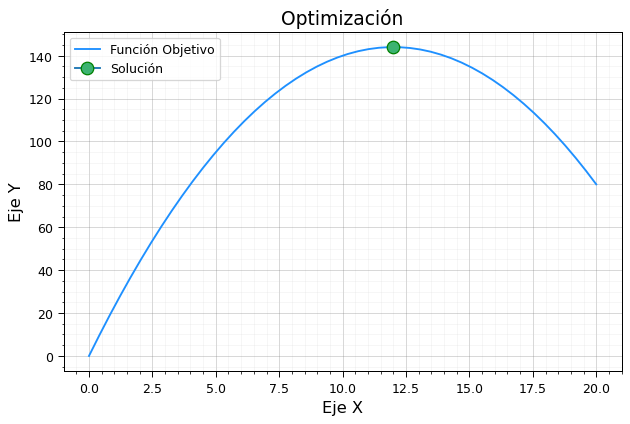

In [20]:
# Valores de X
x = np.linspace(start=0, stop=20)

# Valores de Y
y = 24*x - x**2

# Gráfica
hor = 8
ver = 5
fig1 = plt.figure(figsize=(hor, ver), dpi=90)

plt.plot(x, y, linestyle='-', color='dodgerblue', label='Función Objetivo')
plt.plot(sol.x[0], 24*sol.x[0] - sol.x[0]**2, marker='o', ms='10', markerfacecolor='mediumseagreen', markeredgecolor='green', label='Solución')

formato_grafica(titulo='Optimización', 
                ejex='Eje X', 
                ejey='Eje Y',
                leyenda=True)

<div class="alert alert-block alert-warning">   

**SU TURNO**

Resuelva con `Excel Solver` el siguiente ejercicio de optimización no lineal.

$$
\begin{cases}
  \text{Minimizar} & x^2 + xy\\ 
  \\
  \text{S.A.} & \begin{cases}
                  x^3 + xy = 100 & (1)\\
                  \\
                  x^3 + xy \geq 50 & (2)\\
                \end{cases}\\
  \\
  \text{Variables} & \begin{cases}
                       -100 \leq x \leq 100\\
                       \\
                       -100 \leq y \leq 100
                     \end{cases}
\end{cases} 
$$

</div>

In [21]:
# Función Objetivo
def f_objetivo(z):
    # Variables
    x = z[0]
    y = z[1]

    # Función objetivo
    f_obj = x**2 + x*y

    return f_obj

In [22]:
# Restricciones
def restriccion_1(z):
    # Variables
    x = z[0]
    y = z[1]

    # Restriccion
    res = x**3 + x*y - 100

    return res

def restriccion_2(z):
    # Variables
    x = z[0]
    y = z[1]

    # Restriccion
    res = x**3 + x*y - 50

    return res

In [23]:
# Diccionario de restricción
dict_restriccion_1 = {'type': 'eq', 'fun': restriccion_1}
dict_restriccion_2 = {'type': 'ineq', 'fun': restriccion_2}

# Lista de restricciones
restricciones = [dict_restriccion_1, dict_restriccion_2]
restricciones

[{'type': 'eq', 'fun': <function __main__.restriccion_1(z)>},
 {'type': 'ineq', 'fun': <function __main__.restriccion_2(z)>}]

In [24]:
# Límites
limites = [ [-100, 100], # x
            [-100, 100]] # y

limites

[[-100, 100], [-100, 100]]

In [25]:
# Estimación inicial
estimacion = [1, 1] # x, y
estimacion

[1, 1]

In [26]:
sol = optimize.minimize(fun=f_objetivo,
                        constraints=restricciones,
                        bounds=limites,
                        x0=estimacion)

sol

     fun: -937.1265182425653
     jac: array([-79.06639099,  10.46679688])
 message: 'Optimization terminated successfully'
    nfev: 29
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([  10.46680532, -100.        ])

<a id="section2"></a>
# Sección 2: Sistema de Bombeo

## 2.1. Introducción

Recordemos lo que conversamos de las bombas centrífugas (`C8_factorfriccion.ipynb`).

La potencia que la bomba centrífuga le añade al fluido (conocida como **potencia hidráulica** $P_w$), es:

$$
P_w = \rho g Q H
$$

Donde $\rho$ es la densidad del fluido, $g$ la gravedad, $Q$ el caudal y $H$ la altura manométrica, definida como:

$$
H = \frac{\Delta p}{\rho g}
$$

Siendo $\Delta p$ el cambio de presión entre la entrada y salida de la bomba centrífuga.

Cuando bombeamos un fluido en una tubería, debemos tener presente la fricción dada por las paredes del conducto causan una pérdida de carga $h_f$.

$$
h_f = f \frac{L}{D} \frac{V^2}{2g}
$$

Siendo $f$ el **coeficiente de fricción de Darcy** y $g$ la gravedad.

Entonces, estas pérdidas por fricción en la tubería afecta la cabeza manométrica así: $H - h_f$.

En general, el coeficiente de fricción de Darcy es función del número de Reynolds $Re$ y la rugosidad de la pared $\varepsilon$.

El número de Reynolds $Re$ una relación entre las *fuerzas de inercia* y las *fuerzas viscosas* de un fluido que permiten determinar si el flujo es laminar o turbulento.

$$
Re = \frac{\rho V D}{\mu} = \frac{V D}{\nu}
$$

Siendo $\rho$ la densidad del fluido, $V$ la velocidad de flujo, $D$ el diámetro interno de la tubería, $\mu$ la viscosidad dinámica del fluido y $\nu$ la viscosidad cinemática del fluido.

Típicamente:
- Flujo laminar cuando $Re \leq 2300$. Para este caso, el coeficiente de fricción de Darcy es:

$$
f = \frac{64}{Re}
$$

- Flujo turbulento cuando $Re > 2300$. Para este caso, el coeficiente de fricción de Darcy es:

$$
\frac{1}{\sqrt{f}} = -2 \: \text{log} \left( \frac{\varepsilon / D}{3.7} + \frac{2.51}{Re \sqrt{f}} \right)
$$

Esta ecuación es también conocida como la *ecuación de Colebrook*.


Ahora bien, para que la bomba centrífuga le añada energía al fluido, debe haber un recurso que, asimismo, le suministre energía al dispositivo. Esto último es conocido como **potencia mecánica** $P_f$ y es el producto entre la velocidad de rotación del eje de la bomba $w$ y el torque en el mismo $T$.

$$
P_f = w T
$$

Luego, si el insumo es $P_f$ y la salida es $P_w$, la eficiencia de la bomba es la relación entre estos parámetros, es decir:

$$
\eta = \frac{P_w}{P_f} = \frac{\rho g Q H}{w T}
$$

Entonces, el rendimiento de la bomba centrífuga depende de tres factores: volumétrico, hidráulico y mecánico.

<img src='./img/curvas_teoricas.png' width='400' height='400' />

En la práctica, aunque las curvas de la altura manométrica $H$ aparecen explícitamente, las de potencia $P_f$ y rendimiento $\eta$ deben deducirse a partir de los datos medidos. Fíjense, **es como los laboratorios que hacemos en los cursos de ingeniería mecánica**.

<img src='./img/curvas_reales.png' width='900' height='900' />

Por último, recordemos que:

$$
Q = VA
$$

y

$$
A = \frac{\pi D^2}{4}
$$

Siendo $A$ el área transversal de la tubería cilíndrica.

Dicho esto, ¡optimicemos un sistema de bombeo!

## 2.2. Optimización

Profesionales en ingeniería mecánica detectaron que la pérdida de carga $h_f$ (reducción de altura manométrica o cabeza) no debe superar 50 ft.

Es sabido que el único material disponible es una tubería horizontal de 24 in de diámetro ( $D$ ) de hierro fundido asfáltico, 30 ft de longitud ( $L$ ) y una rugosidad ( $\varepsilon$ ) de 0.0004 ft (equivalente a una rugosidad relativa $\varepsilon_r = \varepsilon / D =$ 0.0008).

También, se conoce que el flujo máximo (caudal $Q$ ) es de 26 000 gpm (galones por minutos), aproximadamente 58 ft$^3$/s (1000 gpm = 2.22 ft$^3$/s).

Además, se tienen los siguientes valores:
- $\rho = 1.94$ slug / ft$^3$
- $\mu = 2.09 · 10^{-5}$ slug / ft·s
- $g = 32.2$ ft/s$^2$

Se decidió contactar al equipo de trabajo del curso IMEC2001 Herramientas Computacionales solucionar el ejercicio de optimización y así conocer los parámetros de funcionamiento óptimos del sistema de bombeo tal que su eficiencia ( $\eta$ ) se maximice.

$$
\begin{cases}
  \text{Maximizar} & \eta = \frac{\rho g Q H}{w T}\\ 
  \\
  \text{S.A.} & \begin{cases}
                  H - h_f = H - f \frac{L}{D} \frac{V^2}{2g} \leq 655 & (1)\\
                  \\
                  Q = V A \leq 58 & (2)\\
                  \\
                  \frac{\rho g Q H}{w T} \leq 1& (3)\\
                \end{cases}\\
  \\
  \text{Variables} & \begin{cases}
                       \rho = 1.94 & [\text{slug / ft}^3]\\
                       \\
                       \mu = 2.09 · 10^{-5} & [\text{slug / ft·s}]\\
                       \\
                       g = 32.2 & [\text{ft/s}^2]\\
                       \\
                       f = 0.02 & [\text{ad.}]\\
                       \\
                       D = 2 & [\text{ft}]\\
                       \\
                       10 \leq Q \leq 58 & [\text{ft}^3\text{/s}]\\
                       \\
                       200 \leq H \leq 655 & [\text{ft}]\\
                       \\
                       50 \leq \omega \leq 122.5 & [\text{rad/s}]\\
                       \\
                       100 \leq T \leq 2000 & [\text{lb-ft}]\\
                     \end{cases}
\end{cases} 
$$

### 2.2.1. Paso 1. Forma Estándar

El ejercicio resultante en forma estandar es:

$$
\begin{cases}
  \text{Minimizar} & -\eta = -\frac{\rho g Q H}{w T}\\ 
  \\
  \text{S.A.} & \begin{cases}
                  H - h_f = H - f \frac{L}{D} \frac{V^2}{2g} \leq 655 & (1)\\
                  \\
                  Q = V A \leq 58 & (2)\\
                  \\
                  \frac{\rho g Q H}{w T} \leq 1& (3)\\
                \end{cases}\\
  \\
  \text{Variables} & \begin{cases}
                       \rho = 1.94 & [\text{slug / ft}^3]\\
                       \\
                       \mu = 2.09 · 10^{-5} & [\text{slug / ft·s}]\\
                       \\
                       g = 32.2 & [\text{ft/s}^2]\\
                       \\
                       f = 0.02 & [\text{ad.}]\\
                       \\
                       D = 2 & [\text{ft}]\\
                       \\
                       10 \leq Q \leq 58 & [\text{ft}^3\text{/s}]\\
                       \\
                       200 \leq H \leq 655 & [\text{ft}]\\
                       \\
                       50 \leq \omega \leq 122.5 & [\text{rad/s}]\\
                       \\
                       100 \leq T \leq 2000 & [\text{lb-ft}]\\
                     \end{cases}
\end{cases} 
$$

In [27]:
D = 2 # [ft]
rho = 1.94 # [slug/ft3]
g = 32.2 # [ft/s2]
L = 30 # [ft]
f = 0.02 # [ad.]
vis = 2.09e-5 # [slug/(ft·s)]

In [28]:
# Área
A = np.pi * (D**2) / 4
A

3.141592653589793

### 2.2.2. Paso 2. Función Objetivo

In [29]:
def f_objetivo(z):
    # Variables
    Q = z[0] 
    H = z[1] 
    w = z[2] 
    T = z[3]
    
    # Función objetivo
    Pw = rho * g * Q * (H - (f * (L/D) * (((Q/A)**2)/(2*g))))
    Pf = (w * T)
    
    eficiencia = -(Pw / Pf)
    
    return eficiencia

### 2.2.3. Paso 3. Restricciones

Definimos las restricciones como funciones en Python. Es decir, se definen $n$ funciones según las $n$ restricciones.

<div class="alert alert-block alert-success">
    
**IMPORTANTE**<br>
La función `scipy.optimize.minimize` asume que el valor devuelto por una función de restricción es mayor que cero (`>=0`).
</div>

Entonces, `scipy.optimize.minimize` **vería** las restricciones de la siguiente manera.

$$
\begin{cases}
  \left( H - f \frac{L}{D} \frac{V^2}{2g} \right) \geq 655 & (1)\\
  \\
  V A \geq 58 & (2)\\
  \\
  \frac{\rho g Q H}{w T} \geq 1 & (3)\\
\end{cases}\\
$$

Estos restricciones debemos adecuarlas a la **forma estandar** al multiplicar cada restricción por -1.

$$
\begin{cases}
  -\left( H - f \frac{L}{D} \frac{V^2}{2g} \right) \leq -655 & (1)\\
  \\
  -\left( V A \right) \leq -58 & (2)\\
  \\
  -\frac{\rho g Q H}{w T} \leq -1 & (3)\\
\end{cases}\\
$$

<div class="alert alert-block alert-success">
    
**IMPORTANTE**<br>
Para definir las restricciones, las funciones se definen agrupando todas las variables de las restricciones al lado izquierdo de la igualdad, de manera que en la parte derecha resulte $=0$ o $\leq 0$.
</div>

$$
\begin{cases}
  655 - \left( H - f \frac{L}{D} \frac{V^2}{2g} \right) \leq 0 & (1)\\
  \\
  58 - \left( V A \right) \leq 0 & (2)\\
  \\
  1 - \frac{\rho g Q H}{w T} \leq 0 & (3)\\
\end{cases}\\
$$

In [30]:
# Restricción 1
def restriccion_1(z):
    # Variables
    Q = z[0]
    H = z[1] 
    w = z[2] 
    T = z[3]
    
    # Restricción
    res = 655 - (H - (f * (L/D) * (((Q/A)**2)/(2*g))))
    
    return res

# Diccionario de restricción
dict_restriccion_1 = {'type': 'ineq', 'fun': restriccion_1}

In [31]:
# Restricción 2
def restriccion_2(z):
    # Variables
    Q = z[0]
    H = z[1] 
    w = z[2] 
    T = z[3]
    
    # Restricción
    res = 58 - Q
    
    return res

# Diccionario de restricción
dict_restriccion_2 = {'type': 'ineq', 'fun': restriccion_2}

In [32]:
# Restricción 3
def restriccion_3(z):
    # Variables
    Q = z[0] # Q = V · A
    H = z[1] 
    w = z[2] 
    T = z[3]
    
    # Restricción
    res = 1 - ( (rho * g * Q * H) / (w * T) )
    
    return res

# Diccionario de restricción
dict_restriccion_3 = {'type': 'ineq', 'fun': restriccion_3}

In [33]:
# Lista de restricciones
restricciones = [dict_restriccion_1, dict_restriccion_2, dict_restriccion_3]
restricciones

[{'type': 'ineq', 'fun': <function __main__.restriccion_1(z)>},
 {'type': 'ineq', 'fun': <function __main__.restriccion_2(z)>},
 {'type': 'ineq', 'fun': <function __main__.restriccion_3(z)>}]

### 2.2.4. Paso 4. Límites de Variables

Creamos una lista de listas `[[], [], ...]` en donde se definan los valores mínimo y máximo que puede tomar las variables. La cantidad de listas internas dependen de la cantidad de variables.

$$
\begin{cases}
   10 \leq Q \leq 58\\
   \\
   200 \leq H \leq 655\\
   \\
   50 \leq \omega \leq 122.5\\
   \\
   100 \leq T \leq 2000\\
\end{cases} 
$$

In [34]:
limites = [ [10, 58], # Q
            [200, 655], # H
            [50, 122.5], # w
            [100, 2000] ] # T

limites

[[10, 58], [200, 655], [50, 122.5], [100, 2000]]

### 2.2.5. Paso 5. Estimación Inicial

Al igual que con la función `scipy.optimize.fsolve`, debemos indicar un valor inicial en donde la estimación numérica iniciará su evaluación.

<div class="alert alert-block alert-success">

**IMPORTANTE**<br>
Se indican tantos valores iniciales como incógnitas se tengan.
</div>

In [35]:
estimacion = [10, # 0 <= Q <= 58
              200, # 350 <= H <= 655
              90, # 0 <= w <= 122.5
              1500] # T >= 0

estimacion

[10, 200, 90, 1500]

### 2.2.6. Paso 6. Ejecutar Optimización

Se ejecuta la librería `scipy.optimize.minimize`, la cual tiene los siguientes parámetros:

- `fun`: La función objetivo (**Paso 2**).
- `constraints`: Lista de restricciones (**Paso 3**).
- `bounds`: Lista de límites de variables (**Paso 4**).
- `x0`: Lista de estimación inicial (**Paso 5**).

In [36]:
sol = optimize.minimize(fun=f_objetivo,
                        constraints=restricciones,
                        bounds=limites,
                        x0=estimacion)

sol

     fun: -0.9997251641677742
     jac: array([-0.09257941, -0.004999  ,  0.01111906,  0.00066648])
 message: 'Optimization terminated successfully'
    nfev: 25
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([  10.79263249,  200.04010069,   89.91089969, 1499.99465467])

El resultado de la optimización nos indica que:
- $Q = 10.79$ ft$^3$/s
- $H = 200.04$ ft
- $\omega = 89.91$ rad/s
- $T = 1499.99$ lb-ft